# Fruit Classification Model

We use an existing CNN model to train the images . The code link can be found on the kaggle link : https://www.kaggle.com/etatbak/cnn-project-with-fruits-data/comments

To analyse the influence of color, shape and texture, a small portion of the code was changed so that the model reads the color images of the fruits. 

The below code is run on the fruits360 data set from kaggle. Link to download the dataset is :  https://www.kaggle.com/fratdogan/fruits-360-with-keras/data

Lets run the code and check the results

In [1]:

# Include the required libraries and mount the gdrive to read the files
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2

import os

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
# filter warnings
warnings.filterwarnings('ignore')


import os
print(os.listdir)

from google.colab import drive
drive.mount('/content/gdrive/')
import nltk
import re

<built-in function listdir>
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
# Only this part of code is modified a little to read the colored images from fruits dataset

# In this section array of images is created 

#First the training dataset

np.random.seed(1234)
directory="/content/gdrive/My Drive/Colab Notebooks/fruits/training"

classes=["Apple Red 1","Avocado","Banana","Cherry 1","Cocos","Kiwi",
         "Lemon","Limes","Mango","Orange"]

all_arrays=[]

img_size=100
for i in classes:
    path=os.path.join(directory,i)
    class_num=classes.index(i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),
                            cv2.IMREAD_COLOR)
        img_array=cv2.resize(img_array,(img_size,img_size))
        all_arrays.append([img_array,class_num])

In [0]:
# Next is reading the test dataset

directory2="/content/gdrive/My Drive/Colab Notebooks/fruits/Test/"

classes2=["Apple Red 1","Avocado","Banana","Cherry 1","Cocos","Kiwi",
         "Lemon","Limes","Mango","Orange"]

all_arrays2=[]
img_size=100
for i in classes2:
    path=os.path.join(directory2,i)
    class_num2=classes2.index(i)
    for img in os.listdir(path):
        img_array2=cv2.imread(os.path.join(path,img),
                             cv2.IMREAD_COLOR)
        
        img_array2=cv2.resize(img_array2,(img_size,img_size))
        all_arrays2.append([img_array2,class_num2])

In [0]:
# X and Y labels are created for the purpose of training 

import random
random.shuffle(all_arrays)

X_train=[]
Y_train=[]
for features,label in all_arrays:
    X_train.append(features)
    Y_train.append(label)
X_train=np.array(X_train) #arraying

import random
random.shuffle(all_arrays2)

X_test=[]
Y_test=[]
for features,label in all_arrays2:
    X_test.append(features)
    Y_test.append(label)
X_test=np.array(X_test) #arraying

In [5]:
# since the colored images are take, the shape if the image is (100,100,3)

#normalization and reshaping
X_train=X_train.reshape(-1,img_size,img_size,3)
X_train=X_train/255
X_test=X_test.reshape(-1,img_size,img_size,3)
X_test=X_test/255
print("shape of X_train= ",X_train.shape)
print("shape of X_test=  ",X_test.shape)

shape of X_train=  (4808, 100, 100, 3)
shape of X_test=   (1637, 100, 100, 3)


In [6]:
from keras.utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=10)
Y_test=to_categorical(Y_test,num_classes=10)

Using TensorFlow backend.


In [0]:
# labels are converted to hot encoding values

from sklearn.model_selection import  train_test_split
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [8]:
#The Datas were separated as train and validation datasets
# Keras library was used to connect labels-layers 
# overfitting is avoided using drop out 
# Variance is reduced using ReLu 


from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))
#defining optimizer
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
#compile the model
model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])

epochs=40
batch_size=36

W0822 19:33:32.376444 140341831120768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0822 19:33:32.432123 140341831120768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0822 19:33:32.439840 140341831120768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0822 19:33:32.496282 140341831120768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0822 19:33:32.503175 140341831120768 deprecation_wrapp

In [9]:
# Data augmentation is performed 

# to avoid overfitting zooming, rotating, flipping , shifting is used to avoid overfitting 

datagen=ImageDataGenerator(featurewise_center=False, #set input mean to 0
                           samplewise_center=False,  #set each sample mean to 0
                           featurewise_std_normalization=False, #divide input datas to std
                           samplewise_std_normalization=False,  #divide each datas to own std
                           zca_whitening=False,  #dimension reduction
                           rotation_range=0.5,    #rotate 5 degree
                           zoom_range=0.5,        #zoom in-out 5%
                           width_shift_range=0.5, #shift 5%
                           height_shift_range=0.5,
                           horizontal_flip=False,  #randomly flip images
                           vertical_flip=False,
                           )
datagen.fit(x_train)

#model fitting
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )

Epoch 1/40
106/106 [==============================] - 57s 537ms/step - loss: 0.3111 - acc: 0.8990 - val_loss: 0.2619 - val_acc: 0.9007
Epoch 2/40
106/106 [==============================] - 56s 524ms/step - loss: 0.2105 - acc: 0.9138 - val_loss: 0.1534 - val_acc: 0.9279
Epoch 3/40
106/106 [==============================] - 58s 548ms/step - loss: 0.1492 - acc: 0.9340 - val_loss: 0.1392 - val_acc: 0.9378
Epoch 4/40
106/106 [==============================] - 56s 526ms/step - loss: 0.1029 - acc: 0.9550 - val_loss: 0.0383 - val_acc: 0.9900
Epoch 5/40
106/106 [==============================] - 56s 526ms/step - loss: 0.0681 - acc: 0.9732 - val_loss: 0.0614 - val_acc: 0.9680
Epoch 6/40
106/106 [==============================] - 55s 523ms/step - loss: 0.0494 - acc: 0.9807 - val_loss: 0.0324 - val_acc: 0.9923
Epoch 7/40
106/106 [==============================] - 55s 521ms/step - loss: 0.0411 - acc: 0.9849 - val_loss: 0.0345 - val_acc: 0.9848
Epoch 8/40
106/106 [==============================] - 5

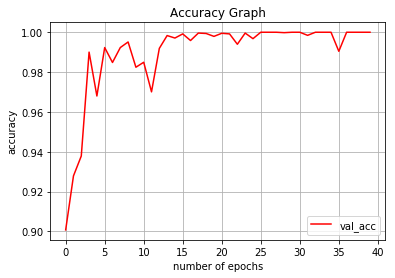

In [10]:
# Accuracy graph is plotted to evaluate the model accuracy

plt.plot(history.history["val_acc"],color="r",label="val_acc")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

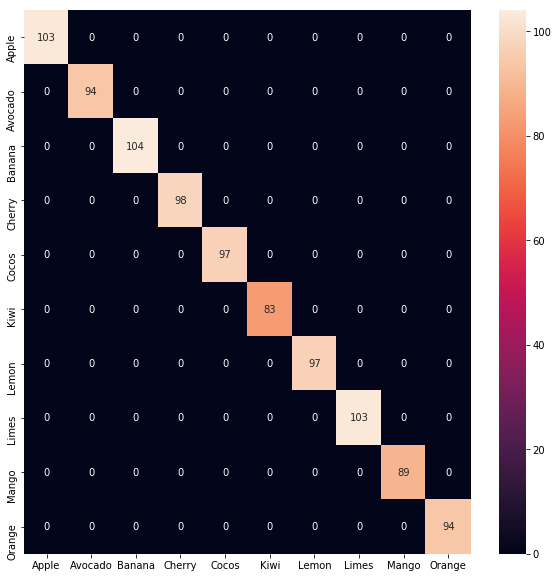

In [13]:
#confusion matrix for training 

y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
#fruit_names=["Apple","Banana"]
fruit_names=["Apple","Avocado","Banana","Cherry","Cocos","Kiwi","Lemon","Limes","Mango","Orange"]

f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()

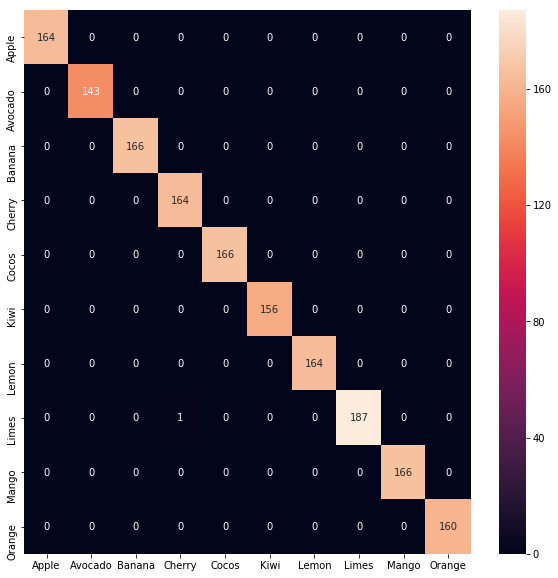

In [15]:
#confusion matrix for test 

y_pred2=model.predict(X_test)
y_pred_classes2=np.argmax(y_pred2,axis=1)
y_true2=np.argmax(Y_test,axis=1)
#compute conf mat
conf_mat2=confusion_matrix(y_true2,y_pred_classes2)
#plot the con mat
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat2,annot=True,fmt=".0f")
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()